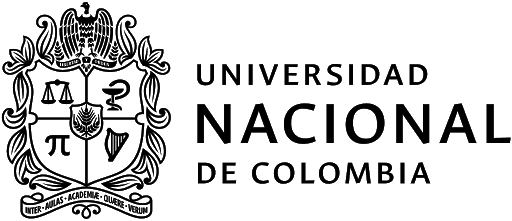

<font size="6" color="blue"><center> __Identificación de Rostros con OpenCV__ </center></font>
<font size="4" ><center> Deivid Alejandro Coronado Sarmiento </center></font>
<font size="4" ><center> Sergio Andres Diaz Vera </center></font>
<font size="4" ><center> Miguel Angel Robayo Bernal </center></font>

<font size="4" color="blue">**¿Qué es la detección de rostros?**</font>

<font size="3">  
Un sistema de detección facial está diseñado para responder a esta pregunta: ¿hay un rostro esta imagen? Un sistema de detección facial determina la presencia, la ubicación, la escala y (posiblemente) la orientación de cualquier rostro presente en una fotografía o en un fotograma de vídeo. 
</font>

<font size="3">  
El sistemas de detección puede ofrecer una estimación aproximada del nivel de confianza de la predicción en forma de probabilidad o puntuación de confianza. Si un sistema de detección facial no detecta correctamente un rostro, o proporciona una predicción con un nivel de confianza bajo respecto a un rostro real, esto se denomina una detección omitida o un falso negativo. Si un sistema de detección facial predice de forma incorrecta la presencia de un rostro con un alto nivel de confianza, se trata de una falsa alarma o de un falso positivo.
</font>

[Amazon: Información general de detección y comparación de rostros](https://docs.aws.amazon.com/es_es/rekognition/latest/dg/rekognition-dg.pdf#face-feature-differences)

<font size="4" color="blue">**Captura de Rostros de Imagenes**</font>

Importamos y leemos las librerias necesarias.

In [2]:
import cv2 ##libreria usada para el manejo de imagenens y deteccion de rostros 
import os ## Libreria usada para controlar carpetas

Seleccionamos el directorio de trabajo donde se va a guardar nuestra informacion.

In [3]:
imagesPath = "Imagenes"
imagesPathList = os.listdir(imagesPath)

Seleccionamos el directorio donde se van a guardar los rostros del video que seran usados para el entrenamiento del sistema, si el directorio no existe, lo creamos con la siguiente instruccion.

In [4]:
if not os.path.exists('Rostros Imagenes'):
    print('Carpeta creada: Rostros Imagenes')
    os.makedirs('Rostros Imagenes')

Carpeta creada: Rostros Imagenes


El cuerpo del programa

In [5]:
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
count = 0
for imageName in imagesPathList:
    image = cv2.imread(imagesPath+'/'+imageName)
    imageAux = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = faceClassif.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(image, (x,y),(x+w,y+h),(128,0,255),2)
    cv2.imshow('image',image)
    k = cv2.waitKey(0)
    if  k == ord('s'):
        for (x,y,w,h) in faces:
            rostro = imageAux[y:y+h,x:x+w]
            rostro = cv2.resize(rostro,(150,150), interpolation=cv2.INTER_CUBIC)
            cv2.imwrite('Rostros Imagenes/rostro_{}.jpg'.format(count),rostro)
            count = count +1
    elif k == 27:
        break
cv2.destroyAllWindows()

<font size="4" color="blue">**Captura Rostros de un Video o Stream**</font>

Importamos y leemos las librerias necesarias.

In [6]:
import cv2
import os
import imutils

Seleccionamos el directorio de trabajo donde se va a guardar nuestra informacion.

In [7]:
cap = cv2.VideoCapture('Video/video.mp4')
dataPath = 'Data'#Cambia a la ruta donde hayas almacenado Data

Seleccionamos el directorio donde se van a guardar los rostros del video que seran usados para el entrenamiento del sistema, si el directorio no existe, lo creamos con la siguiente instruccion.

In [8]:
personName = 'Dolly'
personPath = dataPath + '/' + personName
if not os.path.exists(personPath):
    print('Carpeta creada: ',personPath)
    os.makedirs(personPath)

El cuerpo del programa.

In [9]:
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
count = 0
while True:
    
    ret, frame = cap.read()
    if ret == False: break
    frame =  imutils.resize(frame, width=640)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    auxFrame = frame.copy()
    faces = faceClassif.detectMultiScale(gray,1.25,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
        rostro = auxFrame[y:y+h,x:x+w]
        rostro = cv2.resize(rostro,(300,300),interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(personPath + '/rotro_{}.jpg'.format(count),rostro)
        count = count + 1
    cv2.imshow('frame',frame)
    k =  cv2.waitKey(1)
    if k == 27 or count >= 500:
        break
cap.release()
cv2.destroyAllWindows()